# Demo: Imputing Data
<b>Data imputation:  </b> the substitution of estimated values for missing or inconsistent data items (fields). The substituted values are intended to create a data record that does not fail edits.

Source: http://www.unece.org/fileadmin/DAM/stats/publications/editingglossary.pdf

## Imputing Data: Titanic Dataset
Let's take a look at the titanic dataset from last week again.

In [3]:
import pandas as pd

titantic_df = pd.read_csv('titantic.csv')

In [4]:
titantic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titantic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


At this point we can see that the titantic dataset has 891 rows. It looks like the columns `Cabin` and `Age` have a fair number of missing values. 

<b>Note:</b> If you are working with a large dataset, info() might not give you a count of the non-null values in each column. In this case, you will need derived the number of missing values separately.

In [6]:
# alternate way to test for missing values
titantic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Given the high percentage of missing values in `Cabin`, I'm going to drop this column. 

While I'm reducing the size of my dataframe, I'm going to also drop the `PassengerId`, `Ticket` and `Fare` at this time. `PassengerId` is literally a counter variable, `Ticket` is the physical number on the ticket and `Fare` is the amount the ticket was sold for. These columns are not necessary <u>for this demonstration</u>. Dropping columns needs to be evaluated on an anlysis-by-anlysis basis.

In [7]:
titantic_df.drop(['PassengerId','Ticket','Fare','Cabin'],axis=1,inplace=True)

<div class="alert alert-block alert-success">
<b>Pop Quiz::: What does inplace = True do? What is another way to accomplish the same result without using this argument?</b> <br>
A - The `inplace = True` argument tells pandas to make the changes to the df. Another way to do this would have been to reassign the changed df to the orignal df. <br>For example, titantic_df = titantic_df.dropna('Cabin',axis=1)
</div>

In [8]:
# check to see that the correct column was dropped
titantic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


### Embarked missing values
So this leaves us the `Embarked` and `Age` to clean up.

Let's start with `Embarked`. We will start by seeing the distribution of the existing data values.

In [9]:
titantic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We are only missing 2 data points for `Embarked` and over 70% of the passengers boarded the Titanitc at port 'S', so I'm going to fill these two data points in with an 'S'. We can use the pandas function `fillna()` for this.

In [8]:
titantic_df['Embarked'].fillna('S', inplace=True)

In [9]:
titantic_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Age missing values
Now `Age` is going to be a little bit more complicated. Roughly 20% of the age values are missing. We can consider three methods to fill in the missing `Age` values.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among `Age`, `Sex`, and `Pclass`. Guess Age values using median values for `Age` across sets of `Pclass` and `Sex` feature combinations. So, median `Age` for `Pclass=1` and `Sex`=0, Pclass=1 and `Sex`=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of `Pclass` and `Sex` combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. I'm going to proceed with method 2.

To start, I'm going to convert the `Sex` to be a binary numeric representation rahter than the existing 'M'|'F' characters.

In [10]:
titantic_df['Sex'] = titantic_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [11]:
titantic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [12]:
titantic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,S
5,0,3,"Moran, Mr. James",0,NaN,0,0,Q
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,S
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,C


I'm going to plot the distribution of passenger ages, based on `Sex` and `Pclass` to see if those variables to in fact effect `Age`.

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-block alert-success">
<b>Pop Quiz::: Any idea what the last line above does?</b> <br>
A - Jupyter has a set of special commands that only work inside notebooks. They are known as magic commands and are denoted with a '%'. This particular magic command tells the notebook to display a plot without forcing us to type 'plot.show()'. <br>
To read more about magic command, go to https://ipython.readthedocs.io/en/stable/interactive/magics.html
</div>

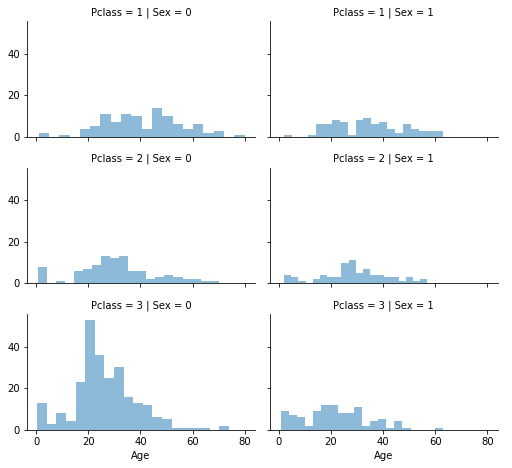

In [14]:
grid = sns.FacetGrid(titantic_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Wow! As it does appear that `Age` is related to both `Sex` and `Pclass`. 

Let us start by preparing an empty array to contain guessed `Age`  based on `Sex` and `Pclass`.

In [15]:
median_ages = np.zeros((2,3))
median_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over `Sex` (0 or 1) and `Pclass` (1, 2, 3) to calculate median values of `Age` for the six combinations.

In [16]:
for i in range(0, 2): #loop through Sex
    for j in range(0, 3): #loop through Pclass
        s_p_age_df = titantic_df[(titantic_df['Sex'] == i) & (titantic_df['Pclass'] == j+1)]['Age'].dropna()
        age_guess = s_p_age_df.median()
        median_ages[i,j] = int(age_guess)       

In [17]:
median_ages

array([[40., 30., 25.],
       [35., 28., 21.]])

Now assign the median age to each passenger with a missing `Age` value based on their `Sex` and `Pclass`.

In [18]:
for i in range(0, 2): #loop through Sex
    for j in range(0, 3): #loop through Pclass
        titantic_df.loc[ (titantic_df.Age.isnull()) \
                        & (titantic_df.Sex == i) \
                        & (titantic_df.Pclass == j+1), \
                'Age'] = median_ages[i,j] 

# make the changes to the dataframe permanent        
titantic_df['Age'] = titantic_df['Age'].astype(int)

Test to see if we filled everything in.

In [19]:
titantic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Now let's take a look at how the distribution for each `Sex` and `Pclass` combination has changed.

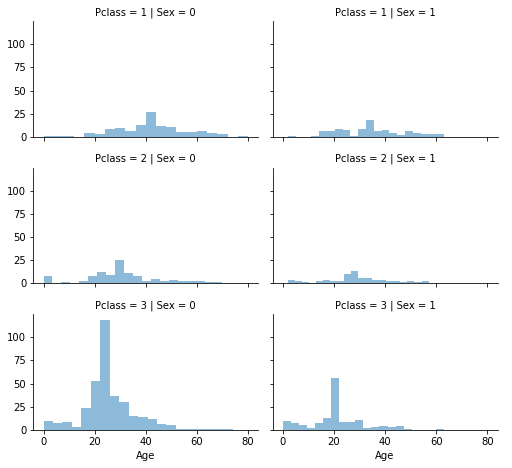

In [20]:
grid = sns.FacetGrid(titantic_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

So, the graphs have changed, which we would expect since we filled 20% of the dataset with the median value of their `Sex` and `Pclass`. Even though the shape of the individual graphs is different, we were able to preserve some characteristists of the overall dataset. For example, passengers in Pclass = 3 were younger than their Pclass = 1 or 2 counterparts.